In [5]:
import qiskit
import numpy as np
import qtm.constant, qtm.nqubit, qtm.fubini_study
import importlib
importlib.reload(qtm.fubini_study)
importlib.reload(qtm.nqubit)

<module 'qtm.nqubit' from 'c:\\Users\\haime\\OneDrive\\Máy tính\\QuantumTomography\\codes\\qtm\\nqubit.py'>

In [10]:
# Init parameters
num_qubits = 6
num_layers = 2
thetas = np.ones(num_layers*(2*num_qubits - 2))
theta = np.pi / 2
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)

loss_values = []
thetass = []
for i in range(0, 100):
    print(i)
    G = qtm.fubini_study.qng(qc.copy(), thetas, qtm.nqubit.create_star2graph_state, num_layers)
    grad_loss = qtm.base.grad_loss(
        qc, 
        qtm.nqubit.create_GHZchecker_star2graph,
        thetas, r = 1/2, s = np.pi/2, num_layers = num_layers, theta = theta)
    thetas = np.real(thetas - qtm.constant.learning_rate*(np.linalg.inv(G) @ grad_loss)) 
    qc_copy = qtm.nqubit.create_GHZchecker_star2graph(qc.copy(), thetas, num_layers, theta)  
    loss = qtm.base.loss_basis(qtm.base.measure(qc_copy, list(range(qc_copy.num_qubits))))
    loss_values.append(loss)
    thetass.append(thetas)
# traces_ghz, fidelities_ghz = [], []
# for thetas in thetass_ghz:
#     # Get |psi> = U_gen|000...>
#     qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
#     qc = qtm.nqubit.create_koczor_state(qc, thetas, num_layers = num_layers)
#     psi = qiskit.quantum_info.Statevector.from_instruction(qc)
#     rho_psi = qiskit.quantum_info.DensityMatrix(psi)
#     # Get |psi~> = U_target|000...>
#     qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
#     qc1 = qtm.nqubit.create_ghz_state(qc1, theta = theta)
#     psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
#     rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
#     # Calculate the metrics
#     trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
#     traces_ghz.append(trace)
#     fidelities_ghz.append(fidelity)
    # Plot loss value in 100 steps
# print('Writting ...')

# np.savetxt("../../experiments/koczor_ansatz_15layer_qngadam/" + str(num_layers) + "/loss_values_ghz.csv", loss_values_ghz, delimiter=",")
# np.savetxt("../../experiments/koczor_ansatz_15layer_qngadam/" + str(num_layers) + "/thetass_ghz.csv", thetass_ghz, delimiter=",")
# np.savetxt("../../experiments/koczor_ansatz_15layer_qngadam/" + str(num_layers) + "/traces_ghz.csv", traces_ghz, delimiter=",")
# np.savetxt("../../experiments/koczor_ansatz_15layer_qngadam/" + str(num_layers) + "/fidelities_ghz.csv", fidelities_ghz, delimiter=",")




0
1
2
3
4
5
6


In [3]:
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/loss_values_qng.csv", loss_values, delimiter=",")
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/thetass_qng.csv", thetass, delimiter=",")

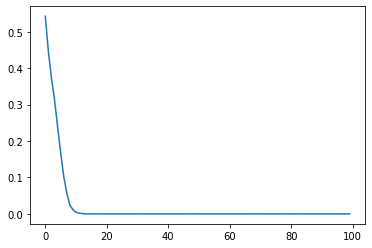

In [ ]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [5]:
traces = []
fidelities = []
i = 0
for thetas in thetass:

    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_ghz_state(qc1, theta = theta)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/traces_adam.csv", traces, delimiter=",")
np.savetxt("../experiments/star_ansatz_ghz/" + str(num_qubits) + "/fidelities_adam.csv", fidelities, delimiter=",")

### W state preparation

In [27]:
# Init parameters
num_qubits = 10
num_layers = 2
thetas = np.ones(num_layers*(2*num_qubits - 2))

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetass, loss_values = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.nqubit.create_Wchecker_star2graph, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.base.loss_fubini_study,
    optimizer = qtm.base.adam,
    verbose = 1,
    num_layers = num_layers,
    is_return_all_thetas = True
)

np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/loss_values_adam.csv", loss_values, delimiter=",")
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/thetass_adam.csv", thetass, delimiter=",")

Step: 100%|██████████| 100/100 [32:09<00:00, 19.29s/it]


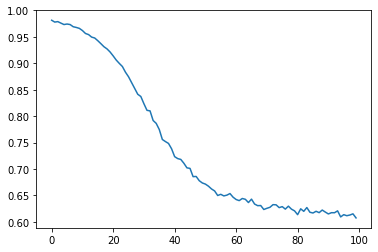

In [28]:
from matplotlib import pyplot as plt
plt.plot(loss_values)

In [29]:
traces = []
fidelities = []
i = 0
for thetas in thetass:

    # Get |psi> = U_gen|000...>
    qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc = qtm.nqubit.create_star2graph_state(qc, thetas, num_layers)
    psi = qiskit.quantum_info.Statevector.from_instruction(qc)
    rho_psi = qiskit.quantum_info.DensityMatrix(psi)
    # Get |psi~> = U_target|000...>
    qc1 = qiskit.QuantumCircuit(num_qubits, num_qubits)
    qc1 = qtm.nqubit.create_w_state(qc1)
    psi_hat = qiskit.quantum_info.Statevector.from_instruction(qc1)
    rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
    # Calculate the metrics
    trace, fidelity = qtm.base.get_metrics(psi, psi_hat)
    traces.append(trace)
    fidelities.append(fidelity)
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/traces_adam.csv", traces, delimiter=",")
np.savetxt("../experiments/star_ansatz_w/" + str(num_qubits) + "/fidelities_adam.csv", fidelities, delimiter=",")